In [1]:
!pip install pandas numpy matplotlib

import pandas as pd
import numpy as np


In [2]:
# Read the CSV file
df = pd.read_csv("heatpump-2025-01-01.csv")

# Display the first few rows to verify the data
df.head()

,Timestamp,Frostschutz,HKPumpeAktiv,HKSupplyTemp,HKWunschTemp,HeizKurveNeigung,HeizkurveNiveau,KompressorPhase,KompressorStatus,AussenTemperatur,SpeicherTemp,SupplyTempPrimaryCircuit,VerbrauchHeute,VolumenStrom,WERücklauf,WEVorlauf
0,2025-01-01T14:18:34.371549,0,1,45.7,21.5,1.2,3,ready,0,4.7,45.4,5.4,30.3,0,44.3,43.4
1,2025-01-01T14:18:45.947987,0,1,45.7,21.5,1.2,3,ready,0,4.7,45.4,5.4,30.3,0,44.3,43.4
2,2025-01-01T14:21:35.330261,0,1,45.2,21.5,1.2,3,ready,0,4.7,45.2,5.4,30.3,0,44.3,42.9
3,2025-01-01T14:22:36.306632,0,1,45.2,21.5,1.2,3,ready,0,4.7,45.0,5.4,30.3,0,44.3,42.9
4,2025-01-01T14:23:37.204769,0,1,45.2,21.5,1.2,3,ready,0,4.7,44.8,5.4,30.3,0,44.3,42.4


# Convert data

In [3]:
# Fix Typo
# df = df.drop('WePumpe',axis=1)

In [4]:
df['HKWunschTemp1'] = pd.to_numeric(df['HKWunschTemp'], errors='coerce')
df['Timestamp'] = pd.to_datetime(df.Timestamp)
df['TimeOnly'] = df.Timestamp.dt.strftime('%H:%M:%S')
df['WEPumpe'] = (df.VolumenStrom > 300.0).astype(int)
df.describe(include='all')

,Timestamp,Frostschutz,HKPumpeAktiv,HKSupplyTemp,HKWunschTemp,HeizKurveNeigung,HeizkurveNiveau,KompressorPhase,KompressorStatus,AussenTemperatur,SpeicherTemp,SupplyTempPrimaryCircuit,VerbrauchHeute,VolumenStrom,WERücklauf,WEVorlauf,HKWunschTemp1,TimeOnly,WEPumpe
count,574,574.0,574.000000,574.000000,574,574.0,574.0,574,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,365.000000,574,574.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,574,NaN
top,NaN,NaN,NaN,NaN,21.5,NaN,NaN,ready,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:59:04,NaN
freq,NaN,NaN,NaN,NaN,313,NaN,NaN,574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
mean,2025-01-01 19:09:47.387936768,0.0,0.635889,46.913589,NaN,1.2,3.0,NaN,0.247387,5.129617,46.829268,5.951220,35.779268,526.240418,43.929094,43.067770,21.143836,NaN,0.285714
min,2025-01-01 14:18:34.371549,0.0,0.000000,33.900000,NaN,1.2,3.0,NaN,0.000000,4.200000,33.600000,4.400000,0.000000,0.000000,32.500000,32.300000,19.000000,NaN,0.000000
25%,2025-01-01 16:45:19.586085376,0.0,0.000000,45.825000,NaN,1.2,3.0,NaN,0.000000,4.700000,45.875000,5.600000,35.225000,0.000000,41.500000,39.900000,21.500000,NaN,0.000000
50%,2025-01-01 19:08:34.346200320,0.0,1.000000,47.900000,NaN,1.2,3.0,NaN,0.000000,5.200000,47.800000,5.900000,39.000000,0.000000,44.900000,42.400000,21.500000,NaN,0.000000
75%,2025-01-01 21:35:49.365253888,0.0,1.000000,50.200000,NaN,1.2,3.0,NaN,0.000000,5.700000,50.200000,6.600000,44.600000,1859.000000,47.500000,46.275000,21.500000,NaN,1.000000
max,2025-01-01 23:59:04.152371,0.0,1.000000,51.400000,NaN,1.2,3.0,NaN,1.000000,6.200000,51.500000,7.400000,46.600000,1894.000000,51.000000,53.600000,21.500000,NaN,1.000000


# Plots

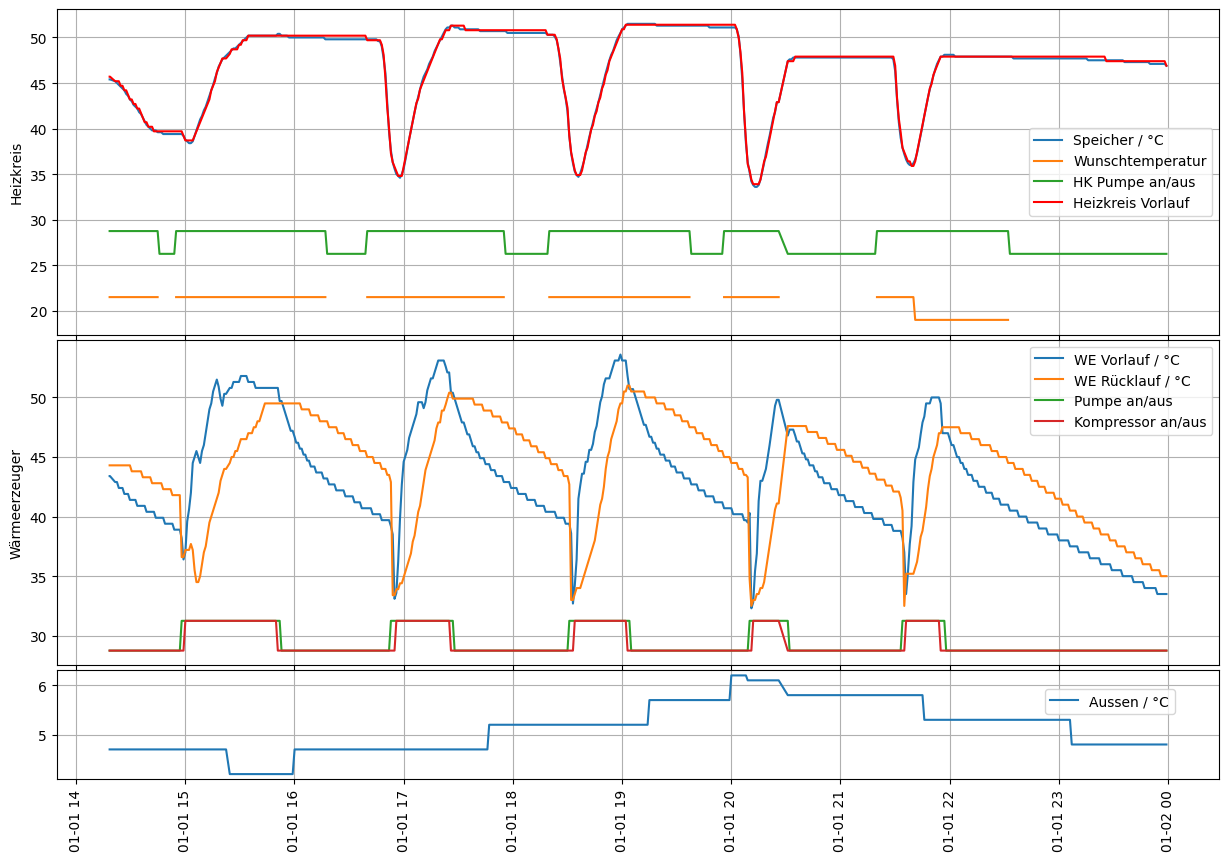

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(3,1, height_ratios=[3,3,1])

ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

# fig, (ax1,ax2,ax3) =plt.subplots(3,1, figsize=(12,10), sharex=True)

ax = ax1
ax.plot(df.Timestamp, df.SpeicherTemp, label='Speicher / °C')
ax.plot(df.Timestamp, df.HKWunschTemp1, label='Wunschtemperatur')
ax.plot(df.Timestamp, df.HKPumpeAktiv*2.5+26.25, label='HK Pumpe an/aus')
ax.plot(df.Timestamp, df.HKSupplyTemp, label='Heizkreis Vorlauf', color='red')
ax.set_ylabel('Heizkreis')
ax.grid(True)

# Turn off x-axis label and ticks for the upper subplot (ax1)
ax.set_xlabel('')  # Remove the x-axis label
ax.set_xticklabels([])  # Remove x-axis tick labels

ax.legend()

ax = ax2
ax.plot(df.Timestamp, df.WEVorlauf, label='WE Vorlauf / °C')
ax.plot(df.Timestamp, df.WERücklauf, label='WE Rücklauf / °C')
ax.plot(df.Timestamp, df.WEPumpe*2.5 + 30-1.25, label='Pumpe an/aus')
ax.plot(df.Timestamp, df.KompressorStatus*2.5 + 30-1.25, label='Kompressor an/aus')
ax.set_ylabel('Wärmeerzeuger')
ax.grid(True)
ax.legend()

# Turn off x-axis label and ticks for the upper subplot (ax1)
ax.set_xlabel('')  # Remove the x-axis label
ax.set_xticklabels([])  # Remove x-axis tick labels

ax3.plot(df.Timestamp, df.AussenTemperatur, label='Aussen / °C')

plt.subplots_adjust(hspace=0.02) 
plt.legend(loc=(0.85,0.6))
plt.grid(True)
plt.xticks(rotation=90)
plt.savefig('2025-01-01.png', format='png', dpi=300, bbox_inches='tight')
plt.show()